<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Assign-input,-output,-weight,-learning-rate" data-toc-modified-id="Assign-input,-output,-weight,-learning-rate-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Assign input, output, weight, learning rate</a></span></li><li><span><a href="#Single-Layer-Neural-Networks-we-talked-last-time" data-toc-modified-id="Single-Layer-Neural-Networks-we-talked-last-time-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Single Layer Neural Networks we talked last time</a></span></li><li><span><a href="#Neural-Networks-with-Hidden-Layers" data-toc-modified-id="Neural-Networks-with-Hidden-Layers-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Neural Networks with Hidden Layers</a></span></li><li><span><a href="#How-many-hidden-nodes-in-a-hidden-layer?" data-toc-modified-id="How-many-hidden-nodes-in-a-hidden-layer?-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>How many hidden nodes in a hidden layer?</a></span><ul class="toc-item"><li><span><a href="#Method1:-Hidden-Nodes-<=--Input-Nodes-*-2" data-toc-modified-id="Method1:-Hidden-Nodes-<=--Input-Nodes-*-2-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Method1: Hidden Nodes &lt;=  Input Nodes * 2</a></span></li><li><span><a href="#Method2:-Hidden-Nodes-=-floor(Input-Nodes-*-2/3-)-+-Ouput-Nodes" data-toc-modified-id="Method2:-Hidden-Nodes-=-floor(Input-Nodes-*-2/3-)-+-Ouput-Nodes-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Method2: Hidden Nodes = floor(Input Nodes * 2/3 ) + Ouput Nodes</a></span></li><li><span><a href="#Method3:-Input-Nodes-<=-Hidden-Nodes-<=-Output-Nodes" data-toc-modified-id="Method3:-Input-Nodes-<=-Hidden-Nodes-<=-Output-Nodes-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Method3: Input Nodes &lt;= Hidden Nodes &lt;= Output Nodes</a></span></li><li><span><a href="#Other-Methods" data-toc-modified-id="Other-Methods-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Other Methods</a></span></li></ul></li><li><span><a href="#How-many-weight-values-do-we-need?" data-toc-modified-id="How-many-weight-values-do-we-need?-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>How many weight values do we need?</a></span></li><li><span><a href="#Math-&amp;-Code" data-toc-modified-id="Math-&amp;-Code-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Math &amp; Code</a></span><ul class="toc-item"><li><span><a href="#Find-output-value" data-toc-modified-id="Find-output-value-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Find output value</a></span></li><li><span><a href="#Find-out-error" data-toc-modified-id="Find-out-error-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Find out error</a></span></li><li><span><a href="#Phase-1" data-toc-modified-id="Phase-1-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Phase 1</a></span></li><li><span><a href="#Phase-2" data-toc-modified-id="Phase-2-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Phase 2</a></span></li><li><span><a href="#Update-Weight" data-toc-modified-id="Update-Weight-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Update Weight</a></span></li></ul></li><li><span><a href="#One-Hidden-Layer-with-3-Nodes-Full-Code" data-toc-modified-id="One-Hidden-Layer-with-3-Nodes-Full-Code-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>One Hidden Layer with 3 Nodes Full Code</a></span></li><li><span><a href="#No-Hidden-Layer,-Single-Layer-(Previous-Lecture)" data-toc-modified-id="No-Hidden-Layer,-Single-Layer-(Previous-Lecture)-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>No Hidden Layer, Single Layer (Previous Lecture)</a></span></li><li><span><a href="#A-more-complex-example-from-TensorFlow.org" data-toc-modified-id="A-more-complex-example-from-TensorFlow.org-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>A more complex example from TensorFlow.org</a></span></li></ul></div>

In [ ]:
# To show table of content
# !pip3 install jupyter_contrib_nbextensions && jupyter contrib nbextension install
# ref https://towardsdatascience.com/jupyter-notebook-extensions-517fa69d2231

# To drew neural networks
# !pip3 install pygraphviz
# if fail, try "!brew install graphviz" first

In [ ]:
!apt install libgraphviz-dev
!pip install pygraphviz

In [1]:
# Run the setups
import numpy as np
import pandas as pd

import pygraphviz as pgv
from IPython.display import Image

def draw(dot):
    return Image(pgv.AGraph(dot).draw(format='png', prog='dot'))

# single layer
single1 = """
digraph G {
    rankdir=LR
    splines=line
    nodesep=.05; 
    node [label=""];
        
    subgraph cluster_0 {
    color=white;
    node [shape=circle, color=skyblue style=filled, fillcolor=lightskyblue];
    i1[label=<i1>]
    i2[label=<i2>];
    label = "Input Nodes";}

    subgraph cluster_2 {
    color=white;
    node [shape=circle, color=green, style=filled, fillcolor=palegreen];
    o1 [label=<o1>];
    label = "Output";}
        i1 -> o1;i2 -> o1;
}
"""

# multi layer with 4 hidden nodes
multi1 = """
digraph G {
    rankdir=LR
    splines=line
    nodesep=.05;
    node [label=""];
    subgraph cluster_0 {
    color=white;
    node [shape=circle, color=skyblue style=filled, fillcolor=lightskyblue];
    i1[label=<i1>]
    i2[label=<i2>];
    label = "Input Nodes";}

    subgraph cluster_1 {
    color=white;
    node [shape=circle, color=orange, style=filled, fillcolor=lightgoldenrodyellow];
    h1 [label=<h1>]
    h2 [label=<h2>]
    h3 [label=<h3>]
    h4 [label=<h4>];
    label = "Hiddden Layer";}

    subgraph cluster_2 {
    color=white;
    node [shape=circle, color=green, style=filled, fillcolor=palegreen];
    o1 [label=<o1>];
    label = "Output";
  }
        i1 -> h1;i1 -> h2;i1 -> h3;i1 -> h4;
        i2 -> h1;i2 -> h2;i2 -> h3;i2 -> h4;
        h1 -> o1;h2 -> o1;h3 -> o1;h4 -> o1;
}
"""

# multi layer with 3 hidden nodes
multi2 = """
digraph G {
    rankdir=LR
    splines=line
    nodesep=.05;
    node [label=""];
    subgraph cluster_0 {
    color=white;
    node [shape=circle, color=skyblue style=filled, fillcolor=lightskyblue];
    i1[label=<i1>]
    i2[label=<i2>];
    label = "Input Nodes";}

    subgraph cluster_1 {
    color=white;
    node [shape=circle, color=orange, style=filled, fillcolor=lightgoldenrodyellow];
    h1 [label=<h1>]
    h2 [label=<h2>]
    h3 [label=<h3>];
    label = "Hiddden Layer";}

    subgraph cluster_2 {
    color=white;
    node [shape=circle, color=green, style=filled, fillcolor=palegreen];
    o1 [label=<o1>];
    label = "Output";
  }
        i1 -> h1;i1 -> h2;i1 -> h3;
        i2 -> h1;i2 -> h2;i2 -> h3;
        h1 -> o1;h2 -> o1;h3 -> o1;
}
"""

# multi layer with 2 hidden nodes
multi3 = """
digraph G {
    rankdir=LR
    splines=line
    nodesep=.05;
    node [label=""];
    subgraph cluster_0 {
    color=white;
    node [shape=circle, color=skyblue style=filled, fillcolor=lightskyblue];
    i1[label=<i1>]
    i2[label=<i2>];
    label = "Input Nodes";}

    subgraph cluster_1 {
    color=white;
    node [shape=circle, color=orange, style=filled, fillcolor=lightgoldenrodyellow];
    h1 [label=<h1>]
    h2 [label=<h2>];
    label = "Hiddden Layer";}

    subgraph cluster_2 {
    color=white;
    node [shape=circle, color=green, style=filled, fillcolor=palegreen];
    o1 [label=<o1>];
    label = "Output";
  }
        i1 -> h1;i1 -> h2;
        i2 -> h1;i2 -> h2;
        h1 -> o1;h2 -> o1;
}
"""


# multi layer with 3 input nodes and 2 hidden nodes
multi4 = """
digraph G {
    rankdir=LR
    splines=line
    nodesep=.05;
    node [label=""];
    subgraph cluster_0 {
    color=white;
    node [shape=circle, color=skyblue style=filled, fillcolor=lightskyblue];
    i1[label=<i1>]
    i2[label=<i2>]
    i3[label=<i3>];
    label = "Input Nodes";}

    subgraph cluster_1 {
    color=white;
    node [shape=circle, color=orange, style=filled, fillcolor=lightgoldenrodyellow];
    h1[label=<h1>]
    h2[label=<h2>];
    label = "Hiddden Layer";}

    subgraph cluster_2 {
    color=white;
    node [shape=circle, color=green, style=filled, fillcolor=palegreen];
    o1[label=<o1>]
    o2[label=<o2>];
    label = "Output";
  } 
        i1 -> h1;i1 -> h2;
        i2 -> h1;i2 -> h2;
        i3 -> h1;i3 -> h2;
        h1 -> o1;h2 -> o1;
        h1 -> o2;h2 -> o2;
}
"""

# multi layer with 3 input nodes and 3 hidden nodes
multi5 = """
digraph G {
    rankdir=LR
    splines=line
    nodesep=.05;
    node [label=""];
    subgraph cluster_0 {
    color=white;
    node [shape=circle, color=skyblue style=filled, fillcolor=lightskyblue];
    i1[label=<i1>];i2[label=<i2>];i3[label=<i3>];
    label = "Input Nodes";}

    subgraph cluster_1 {
    color=white;
    node [shape=circle, color=orange, style=filled, fillcolor=lightgoldenrodyellow];
    h1 [label=<h1>]
    h2 [label=<h2>]
    h3 [label=<h3>];
    label = "Hiddden Layer";}

    subgraph cluster_2 {
    color=white;
    node [shape=circle, color=green, style=filled, fillcolor=palegreen];
    o1 [label=<o1>]
    o2 [label=<o2>];
    label = "Output";
  }
        i1 -> h1;i1 -> h2;i1 -> h3;
        i2 -> h1;i2 -> h2;i2 -> h3;
        i3 -> h1;i3 -> h2;i3 -> h3;
        h1 -> o1;h2 -> o1;h3 -> o1;
        h1 -> o2;h2 -> o2;h3 -> o2;
}
"""

# multi layer part 1
part1 = """
digraph G {
    rankdir=LR
    splines=line
    nodesep=.05;
    node [label=""];
    subgraph cluster_0 {
    color=white;
    node [shape=circle, color=skyblue style=filled, fillcolor=lightskyblue];
    i1[label=<i1>]
    i2[label=<i2>];
    label = "Input Nodes";}

    subgraph cluster_1 {
    color=white;
    node [shape=circle, color=orange, style=filled, fillcolor=lightgoldenrodyellow];
    h1 [label=<h1>]
    h2 [label=<h2>]
    h3 [label=<h3>];
    label = "Hiddden Layer";}

        i1 -> h1;i1 -> h2;i1 -> h3;
        i2 -> h1;i2 -> h2;i2 -> h3;
}
"""

# multi layer part 2
part2 = """
digraph G {
    rankdir=LR
    splines=line
    nodesep=.05;
    node [label=""];

    subgraph cluster_0 {
    color=white;
    node [shape=circle, color=orange, style=filled, fillcolor=lightgoldenrodyellow];
    h1 [label=<h1>]
    h2 [label=<h2>]
    h3 [label=<h3>];
    label = "Hiddden Layer";}

    subgraph cluster_1 {
    color=white;
    node [shape=circle, color=green, style=filled, fillcolor=palegreen];
    o1 [label=<o1>];
    label = "Output";
  }
        h1 -> o1;h2 -> o1;h3 -> o1;
}
"""

# Assign input, output, weight, learning rate

In [ ]:
data = {'Fever':[0,0,1,1],'Shortness_breath':[0,1,0,1], 'Need_exam':[0,1,1,1]}
covid = pd.DataFrame(data)
covid

In [ ]:
# Simplify our example
data = {'input1':[0,0,1,1],'input2':[0,1,0,1], 'target':[0,1,1,1]}
df = pd.DataFrame(data)
df

# Single Layer Neural Networks we talked last time

$
\begin{vmatrix}
I_1 & I_2 \\
I_1 & I_2 \\
I_1 & I_2 \\
I_1 & I_2 \\
\end{vmatrix} 
\times
\begin{vmatrix}
W_1  \\
W_2  \\
\end{vmatrix} -> 
\begin{vmatrix}
I_w  \\
I_w  \\
I_w  \\
I_w  \\
\end{vmatrix} ->
Activation
 = 
\begin{vmatrix}
O  \\
O  \\
O  \\
O  \\
\end{vmatrix}
$

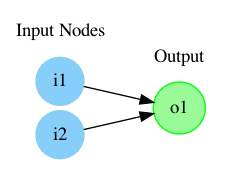

In [6]:
draw(single1)

# Neural Networks with Hidden Layers

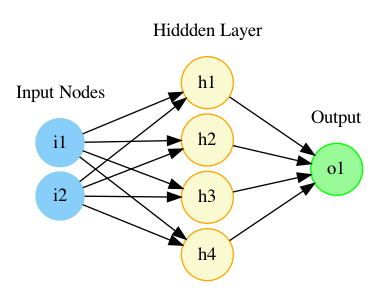

In [2]:
draw(multi1)

# How many hidden nodes in a hidden layer?

## Method1: Hidden Nodes <=  Input Nodes * 2

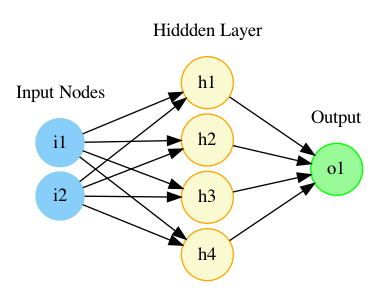

In [13]:
draw(multi1)

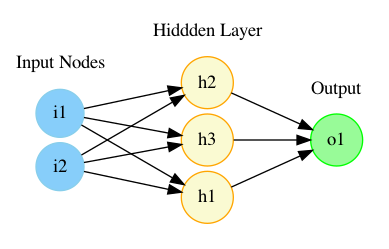

In [4]:
draw(multi2)

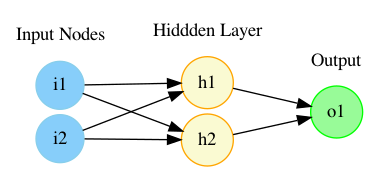

In [5]:
draw(multi3)

## Method2: Hidden Nodes = floor(Input Nodes * 2/3 ) + Ouput Nodes

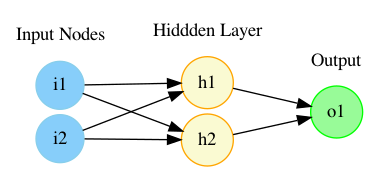

In [7]:
# floor(2*2/3) + 1 = 1 + 1 = 2 
draw(multi3)

## Method3: Input Nodes <= Hidden Nodes <= Output Nodes

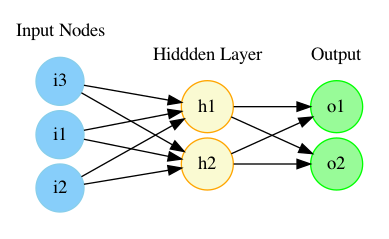

In [8]:
draw(multi4)

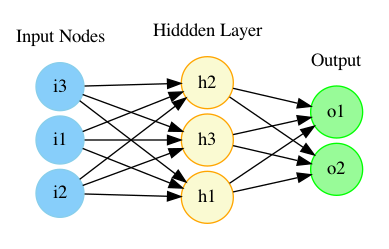

In [9]:
draw(multi5)

## Other Methods

ref: https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

ref:http://hagan.okstate.edu/NNDesign.pdf#page=469

You want to limit the number of free parameters in your model (its degree or number of nonzero weights) to a small portion of the degrees of freedom in your data. The degrees of freedom in your data is the number samples * degrees of freedom (dimensions) in each sample or 𝑁𝑠∗(𝑁𝑖+𝑁𝑜) (assuming they're all independent). So 𝛼 is a way to indicate how general you want your model to be, or how much you want to prevent overfitting.

# How many weight values do we need?

* Hidden Layer: No. of Inputs * Hidden Layer Nodes
* Output Layer: No. of Hidden Layer Nodes * No. of Outputs

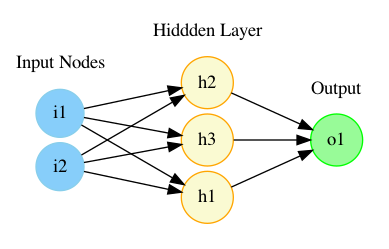

In [14]:
draw(multi2)

# Math & Code

In [ ]:
df

In [ ]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_der(x):
    return sigmoid(x)*(1-sigmoid(x))

## Find output value

For each epoch, we use this formula to update weights to min the standardized gap (e.g. MSE) between output and target
The first step is to find the output using randomly assigned weights

In [ ]:
draw(part1)

$
\begin{vmatrix}
I_1 & I_2 \\
I_1 & I_2 \\
I_1 & I_2 \\
I_1 & I_2 \\
\end{vmatrix} 
\times
\begin{vmatrix}
w_{1h1} & w_{1h2} & w_{1h3}\\
w_{2h1} & w_{2h2} & w_{2h3}\\
\end{vmatrix} 
= 
\begin{vmatrix}
h_{11} & h_{21} & h_{31} \\
h_{12} & h_{22} & h_{31} \\
h_{13} & h_{23} & h_{31} \\
h_{14} & h_{24} & h_{31} \\
\end{vmatrix}
$

In [ ]:
#input_features = np.array([[0,0],[0,1],[1,0],[1,1]])
input_features = df[['input1','input2']].to_numpy()
print(input_features.shape)
input_features

In [ ]:
input_hidden = np.dot(input_features, weight_hidden)
output_hidden = sigmoid(input_hidden)
print('Before Sigmoid \n',input_hidden)
print('Sigmoid \n',output_hidden)
output_hidden.shape

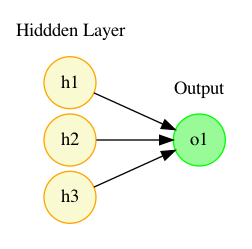

In [10]:
draw(part2)

$
\begin{vmatrix}
h_{11} & h_{21} & h_{31} \\
h_{12} & h_{22} & h_{31} \\
h_{13} & h_{23} & h_{31} \\
h_{14} & h_{24} & h_{31} \\
\end{vmatrix} 
\times
\begin{vmatrix}
w_1 \\
w_1 \\
w_1 \\
\end{vmatrix} 
=
\begin{vmatrix}
o_1 \\
o_1 \\
o_1 \\
o_1 \\
\end{vmatrix}
$

In [ ]:
input_op = np.dot(output_hidden, weight_output)
output_op = sigmoid(input_op)
print('Before Sigmoid \n',input_op)
print('Sigmoid \n',input_op)
input_op.shape

## Find out error

$
\begin{align}
Error = MSE = \frac{1}{2} \sum_ {}(target_1 - output_1)^2
\end{align}
$

In [ ]:
error_out = ((1 / 2) * (np.power((output_op - target_output), 2)))
print(error_out)

## Phase 1

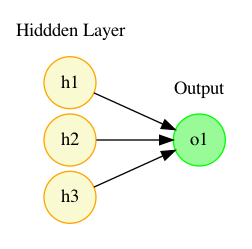

In [11]:
draw(part2)

$\frac{\partial Error}{\partial w_o} = \frac{\partial Error}{\partial out_o} \times \frac{\partial out_o}{\partial in_o} \times  \frac{\partial in_o}{\partial w_o}$

$\frac{\partial Error}{\partial out_o} = output - target \\
\frac{\partial out_o}{\partial in_o} = out_o(1 - out_o) \\
\frac{\partial in_o}{\partial w_o} = input \ value$

In [ ]:
derror_douto = output_op - target_output
douto_dino = sigmoid_der(input_op) 
dino_dwo = output_hidden

derror_dwo = np.dot(dino_dwo.T, derror_douto * douto_dino)
print('derror_dwo \n',derror_dwo)

## Phase 2

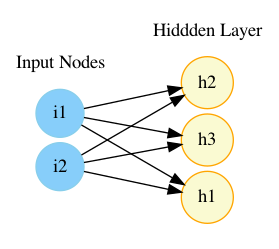

In [12]:
draw(part1)

$\frac{\partial Error}{\partial w_h} = (1)\frac{\partial Error}{\partial out_h} \times (2)\frac{\partial out_h}{\partial in_h} \times  (3)\frac{\partial in_h}{\partial w_h}$

$ (1)
\frac{\partial Error}{\partial out_h} = \frac{\partial Error}{\partial in_o} \times
\frac{\partial in_o}{\partial out_h} \ \because chain \ rule \\
\frac{\partial Error}{\partial out_h} = \frac{\partial Error}{\partial out_o} \times
\frac{\partial out_o}{\partial in_o} \times
\frac{\partial in_o}{\partial out_h} \ \because chain \ rule \ again \\
\frac{\partial Error}{\partial out_o} = output - target \because phase1 \\
\frac{\partial out_o}{\partial in_o} = out_o(1 - out_o)  \because phase1 \\
\frac{\partial in_o}{\partial out_h} = output \ weight = wo \\
$

$ (2)
\frac{\partial out_h}{\partial in_h} = out_h(1-out_h) \\
$

$ (3)
\frac{\partial in_h}{\partial w_h} = input \ value \\
$

In [ ]:
derror_dino = derror_douto * douto_dino
dino_douth = weight_output
derror_douth = np.dot(derror_dino , dino_douth.T)
douth_dinh = sigmoid_der(input_hidden) 
dinh_dwh = input_features

derror_wh = np.dot(dinh_dwh.T, douth_dinh * derror_douth)
print('derror_wh \n', derror_wh)

## Update Weight

$
w_{new} = w_{old} - lr \times \frac{\partial Error}{\partial w}
$

In [ ]:
weight_hidden -= lr * derror_wh
weight_output -= lr * derror_dwo
print('New weight_hidden \n', weight_hidden)
print('New weight_output \n', weight_output)

# One Hidden Layer with 3 Nodes Full Code

In [ ]:
# Reset all parameters
input_features = df[['input1','input2']].to_numpy()
target_output = df[['target']].to_numpy()
target_output = target_output.reshape(4,1)
weight_hidden = np.array([[0.1, 0.2, 0.3],[0.4, 0.5, 0.6]])
weight_output = np.array([[0.7], [0.8], [0.9]])
lr = 0.05

import time
a = time.time()
for epoch in range(10001):
    # Input for hidden layer:
    input_hidden = np.dot(input_features, weight_hidden)
 
    # Output from hidden layer :
    output_hidden = sigmoid(input_hidden)
 
    # Input for output layer :
    input_op = np.dot(output_hidden, weight_output)
 
    # Output from output layer :
    output_op = sigmoid(input_op)
    
    #====== Phase1 ======#
 
    # MSE :
    error_out = ((1 / 2) * (np.power((output_op - target_output), 2)))
    x = error_out.sum()
 
    if epoch%1000 == 0:
        print('Epoch:',epoch,'MSE:',x)
 
    # Derivatives for phase 1 :
    derror_douto = output_op - target_output
    douto_dino = sigmoid_der(input_op) 
    dino_dwo = output_hidden
    derror_dwo = np.dot(dino_dwo.T, derror_douto * douto_dino)
    
    #====== Phase 2 ======#

    # derror_w1 = derror_douth * douth_dinh * dinh_dw1
    # derror_douth = derror_dino * dino_outh
 
    # Derivatives for phase 2 :
    derror_dino = derror_douto * douto_dino
    dino_douth = weight_output
    derror_douth = np.dot(derror_dino , dino_douth.T)
    douth_dinh = sigmoid_der(input_hidden) 
    dinh_dwh = input_features
    derror_wh = np.dot(dinh_dwh.T, douth_dinh * derror_douth)
    
    # Update Weights
    weight_hidden -= lr * derror_wh
    weight_output -= lr * derror_dwo
    
print(time.time()-a)

In [ ]:
# Use the trained model for prediction:
single_point = np.array([0,0])
result1 = np.dot(single_point, weight_hidden) 
result2 = sigmoid(result1)
result3 = np.dot(result2,weight_output)
result4 = sigmoid(result3)
print(result4)

# No Hidden Layer, Single Layer (Previous Lecture)

In [ ]:
# Reset all parameters
input_features = df[['input1','input2']].to_numpy()
target_output = df[['target']].to_numpy()
target_output = target_output.reshape(4,1)
weights = np.array([[0.1],[0.2]])
lr = 0.05

import time
a = time.time()
for epoch in range(10001):
    inputs = input_features
    in_o = np.dot(inputs, weights) #+ bias
    out_o = sigmoid(in_o)
    #error = out_o - target_output
    error_out = ((1 / 2) * (np.power((out_o - target_output), 2)))
    
    x = error.sum()
    if epoch%1000 == 0:
        print('Epoch:',epoch,'Error Sum:',x)
    
    dError_dOut = error #1st part
    dOut_dIn = sigmoid_der(out_o) #2nd part
    inputs = input_features.T #3rd part
    deriv_final = np.dot(inputs, dError_dOut * dOut_dIn) 
    
    weights -= lr * deriv_final 
print(time.time()-a)

In [ ]:
# Use the trained model for prediction:
single_point = np.array([0,0])
result1 = np.dot(single_point, weights)
result2 = sigmoid(result1)
result2

# A more complex example from TensorFlow.org
ref: https://www.tensorflow.org/tutorials/keras/classification

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
#The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels
#And 10000 testing set, with the same 28 x 28 pixels
print('training data shape',train_images.shape)
print('testing data shape',test_images.shape)

In [ ]:
# How does each training data point look like?
print('One raw training data point \n',train_images[0]

In [ ]:
# How does each training data point visually like?
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
# Massage the input data, and press them between 0-1 range
# Since RGB ranges are from 0-255, we devide everything by 255
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
# How dataset visually look like after standardization?
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# Train model
model.fit(train_images, train_labels, epochs=10)

In [ ]:
# Test the model using the data that never joined the training process
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

In [ ]:
# Define prediction
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

In [ ]:
# Show prediction
print(predictions[0])
print('Image belongs to class:', np.argmax(predictions[0]), '\nIt is a',class_names[np.argmax(predictions[0])])
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
#Reference: 
#1.https://math.stackexchange.com/questions/78575/derivative-of-sigmoid-function-sigma-x-frac11e-x
#2.https://www.tensorflow.org/tutorials/keras/classification
#3.https://medium.com/towards-artificial-intelligence/building-neural-networks-from-scratch-with-python-code-and-math-in-detail-i-536fae5d7bbf
#4.https://medium.com/towards-artificial-intelligence/building-neural-networks-with-python-code-and-math-in-detail-ii-bbe8accbf3d1